#### 1. Importing Libraries and Modules

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

#### 2. Load the dataset and Split the dataset into (X) and the (y)

In [ ]:
URL = "https://github.com/itsabhikhm/WomenSafetyApp/raw/main/preprocessedData.csv"
df=pd.read_csv(URL)
X = df.drop('crime', axis=1)
y = df['crime']

#### 3. Encode categorical variables (if any):

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#### 4. Handle data imbalances using oversampling:

In [ ]:
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
X_resampled, y_resampled = X , y

#### 5. Perform feature selection

In [ ]:
selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X_resampled, y_resampled)

In [ ]:
X_selected = X

#### 6. Split the data into training and testing sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### 7. Scale the input features


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# X_train_scaled,X_test_scaled = X_train,X_test

#### 8. Define each algorithm:

In [ ]:
svm_pipeline = make_pipeline(SVC())
dt_pipeline = make_pipeline(DecisionTreeClassifier())
knn_pipeline = make_pipeline(KNeighborsClassifier())
lr_pipeline = make_pipeline(LogisticRegression())
rf_pipeline = make_pipeline(RandomForestClassifier())

#### 9. Define hyperparameter grids for each algorithm:


In [ ]:
svm_param_grid = {'svc__C': [0.1, 1, 10],'svc__kernel': ['linear', 'rbf']}
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 15]}
knn_param_grid = {'kneighborsclassifier__n_neighbors': [5,10, 15]}
lr_param_grid = {'logisticregression__C': [0.1, 1, 10]}
rf_param_grid = {'randomforestclassifier__n_estimators': [100, 200, 300]}

#### 10. Perform hyperparameter tuning using GridSearchCV:


In [ ]:
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5)
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5)
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5)
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5)
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)

# Perform hyperparameter tuning using GridSearchCV
svm_grid_search.fit(X_train_scaled, y_train)
dt_grid_search.fit(X_train_scaled, y_train)
knn_grid_search.fit(X_train_scaled, y_train)
lr_grid_search.fit(X_train_scaled, y_train)
rf_grid_search.fit(X_train_scaled, y_train)

# Select the best models
best_svm_model = svm_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_
best_knn_model = knn_grid_search.best_estimator_
best_lr_model = lr_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Perform cross-validation
svm_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=5)
dt_scores = cross_val_score(best_dt_model, X_train_scaled, y_train, cv=5)
knn_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=5)
lr_scores = cross_val_score(best_lr_model, X_train_scaled, y_train, cv=5)
rf_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5)

# Evaluate the models on the test set
svm_predictions = best_svm_model.predict(X_test_scaled)
dt_predictions = best_dt_model.predict(X_test_scaled)
knn_predictions = best_knn_model.predict(X_test_scaled)
lr_predictions = best_lr_model.predict(X_test_scaled)
rf_predictions = best_rf_model.predict(X_test_scaled)

#### 11. Printing Scores

In [ ]:
# Print cross-validation scores
print("SVM Cross-Validation Scores:", svm_scores)
print("")
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("")
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("")
print("KNN Cross-Validation Scores:", knn_scores)
print("")
print("Random Forest Cross-Validation Scores:", rf_scores)
print("-----------------------------------------------------")

# Print classification report and confusion matrix
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))
print("-----------------------------------------------------")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))
print("-----------------------------------------------------")


print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))
print("-----------------------------------------------------")


print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))
print("-----------------------------------------------------")


print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

SVM Cross-Validation Scores: [0.65373134 0.67462687 0.67065868 0.66766467 0.69760479]

Logistic Regression Cross-Validation Scores: [0.48358209 0.45970149 0.45808383 0.47904192 0.46706587]

Decision Tree Cross-Validation Scores: [0.98208955 0.99104478 0.99401198 0.98203593 0.98802395]

KNN Cross-Validation Scores: [0.98208955 0.9761194  1.         0.98203593 0.98802395]

Random Forest Cross-Validation Scores: [0.98208955 0.99104478 0.99401198 0.98203593 0.98802395]
-----------------------------------------------------
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.71      0.74      0.72       135
           2       1.00      1.00      1.00         3
           3       0.74      0.87      0.80       163
           4       0.67      0.53      0.59        19
           5       0.72      0.63      0.67        78

    accuracy                           0.73       418
   macro avg   

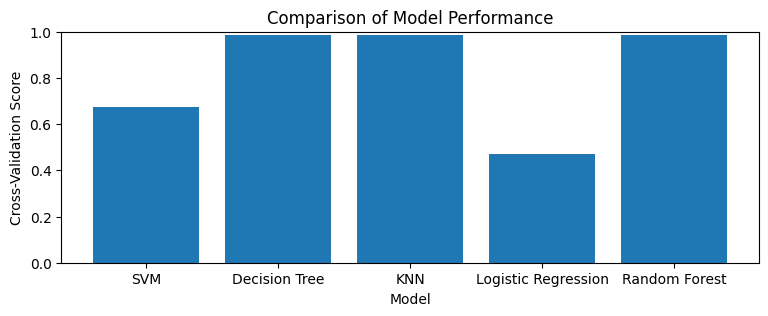

In [ ]:
import matplotlib.pyplot as plt

# Create a list of model names and their corresponding cross-validation scores
model_names = ['SVM', 'Decision Tree', 'KNN', 'Logistic Regression', 'Random Forest']
cross_val_scores = [svm_scores.mean(), dt_scores.mean(), knn_scores.mean(), lr_scores.mean(), rf_scores.mean()]

# Plot the comparison
plt.figure(figsize=(9, 3))
plt.bar(model_names, cross_val_scores)
plt.xlabel('Model')
plt.ylabel('Cross-Validation Score')
plt.title('Comparison of Model Performance')
plt.ylim([0, 1])  # Set the y-axis limit
plt.show()


<Figure size 200x200 with 0 Axes>

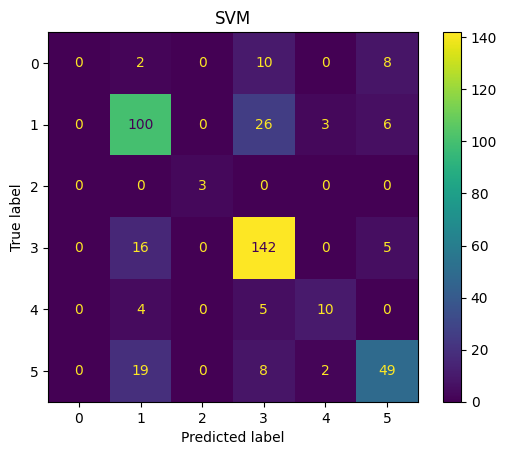

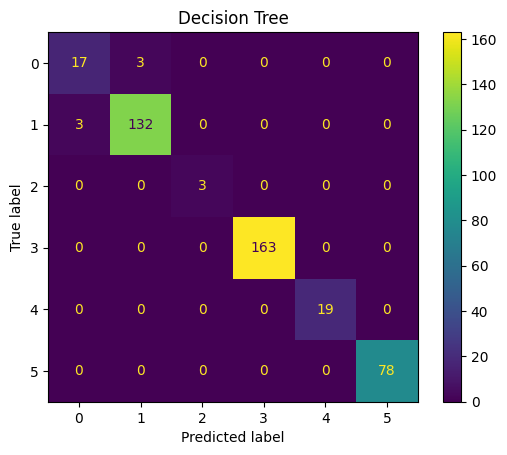

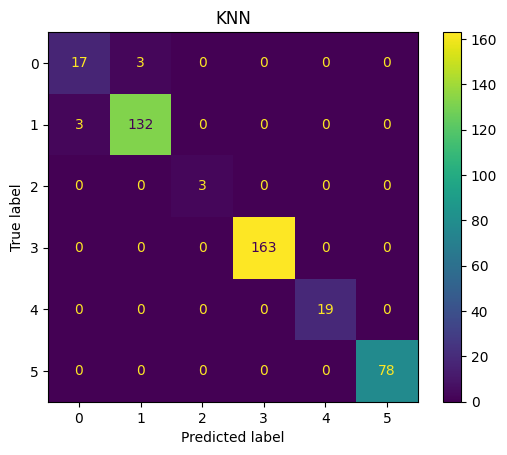

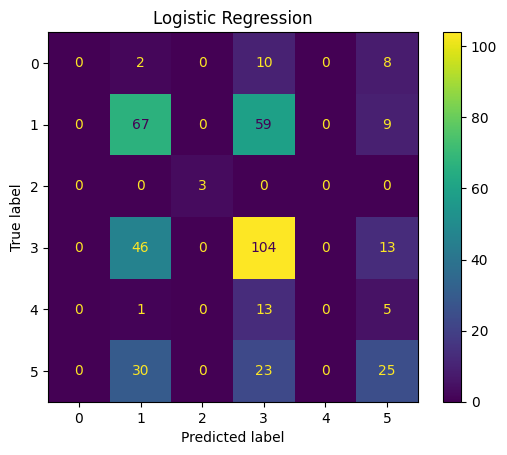

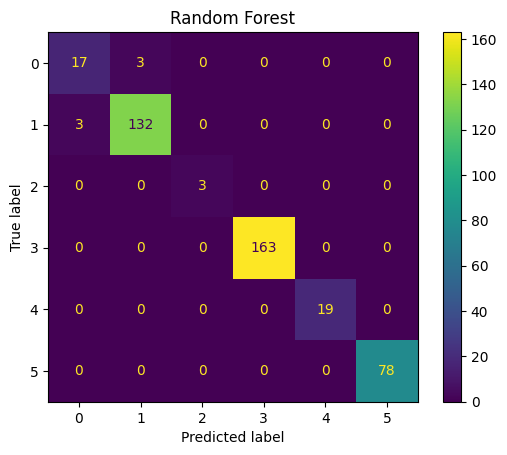

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the best models: best_svm_model, best_dt_model, etc.
models = [best_svm_model, best_dt_model, best_knn_model, best_lr_model, best_rf_model]

plt.figure(figsize=(2, 2))
for i, model in enumerate(models):
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(model_names[i])
plt.show()

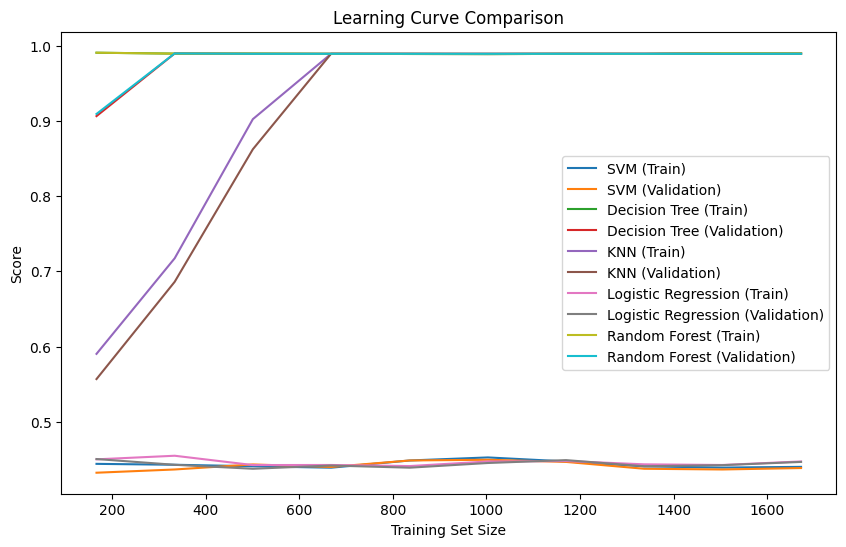

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

plt.figure(figsize=(10, 6))
for i, model_name in enumerate(model_names):
    model = models[i]
    train_sizes, train_scores, val_scores = learning_curve(model, X_selected, y_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label=f'{model_name} (Train)')
    plt.plot(train_sizes, val_scores_mean, label=f'{model_name} (Validation)')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve Comparison')
plt.legend()
plt.show()


In [ ]:
error_rate = []
for i in range(1,140):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

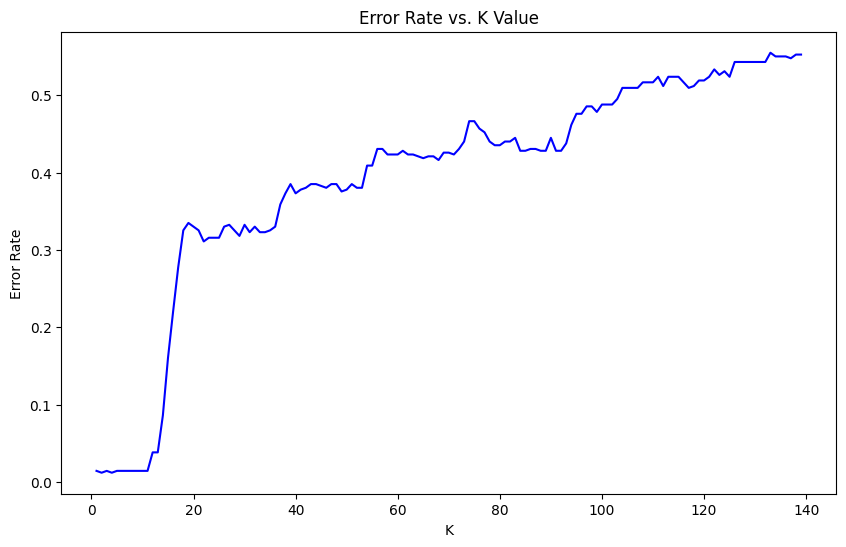

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')